In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [4]:
y_train[0]


5

In [5]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

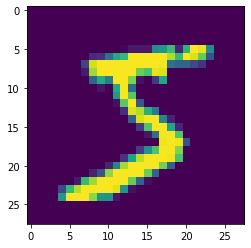

In [6]:
plt.imshow(X_train[0])


In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])


In [12]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))


Epoch 1/5
1875/1875 [==============================] - 214s 114ms/step - loss: 0.2418 - accuracy: 0.9529 - val_loss: 0.1007 - val_accuracy: 0.9685
Epoch 2/5
1875/1875 [==============================] - 223s 119ms/step - loss: 0.0674 - accuracy: 0.9798 - val_loss: 0.0696 - val_accuracy: 0.9790
Epoch 3/5
1875/1875 [==============================] - 216s 115ms/step - loss: 0.0488 - accuracy: 0.9846 - val_loss: 0.0785 - val_accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 217s 116ms/step - loss: 0.0367 - accuracy: 0.9883 - val_loss: 0.0935 - val_accuracy: 0.9765
Epoch 5/5
1875/1875 [==============================] - 217s 116ms/step - loss: 0.0305 - accuracy: 0.9906 - val_loss: 0.0998 - val_accuracy: 0.9767


In [13]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.0997830405831337, 0.9767000079154968]


In [14]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 107ms/step
[[2.69045636e-13 1.59484009e-16 8.78355895e-12 1.48458884e-11
  6.58595000e-20 1.48393042e-17 1.91608508e-22 1.00000000e+00
  3.50472723e-14 1.29037780e-10]
 [2.51116083e-09 9.43920608e-10 1.00000000e+00 7.03347374e-13
  1.95342332e-13 2.97414952e-15 1.14551246e-09 6.66687616e-16
  8.25405855e-10 2.92526504e-19]
 [1.10503163e-06 9.96905863e-01 3.17752921e-07 4.54791831e-08
  3.08304396e-03 3.57644780e-07 1.04378008e-08 1.02420529e-07
  9.01647218e-06 1.79448406e-07]
 [9.99999762e-01 1.01937730e-14 1.04248166e-09 2.55677884e-13
  1.60429642e-10 1.29275635e-11 1.25961472e-08 4.38779915e-12
  7.72499120e-10 2.02985802e-07]]


In [15]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
